# Variational Monte Carlo

We look at the small program from Thijssen's book "Computational Physics".

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [100]:
num_walkers = 2
num_samples = 1000000
alphas = np.linspace(0.1, 1.6, 11)

## One dimensional harmonic oscillator

We restrict ourselves to the one dimensional harmonic oscillator with the Hamiltonian (in natural units)

\begin{align}
    h = -\frac{1}{2}\frac{\text{d}^2}{\text{d}x^2} + \frac{1}{2} x^2.
\end{align}

We know that the exact wavefunction for the ground state is given by

\begin{align}
    \psi_0 = \exp(-x^2/2).
\end{align}

In [5]:
def exact_wavefunction(x):
    return np.exp(-x**2/2.0)

The trial wavefunction we choose will be

\begin{align}
    \psi_T = \exp(-\alpha x^2).
\end{align}

In [4]:
def trial_wavefunction(x, alpha):
    return np.exp(-alpha*x**2)

## The local energy

The local energy of the system is given by

\begin{align}
    E_L(x) &= \frac{h\psi_T}{\psi_T}
    = \alpha + x^2\left(\frac{1}{2} - 2\alpha^2\right).
\end{align}

In [7]:
def local_energy(x, alpha):
    return alpha + x**2*(0.5 - 2*alpha**2)

## The Metropolis scheme

When using Metropolis sampling we have to compute the ratio between the previous and the current step, $p(x, x')$.

\begin{align}
    p(x, x') &= \frac{\psi_T(x)}{\psi_T(x')} \\
        &= \exp\bigl[-\alpha(x^2 - x'^2)\bigr],
\end{align}
where $x$ is the current step and $x'$ the previous.

In [10]:
def ratio(x, x_old, alpha):
    return np.exp(-alpha*(x**2 - x_old**2))
    #return trial_wavefunction(x, alpha)/trial_wavefunction(x_old, alpha)

When we perform a Metropolis step we choose a random walker at position $x$ and propose a new position, $x'$, within some threshold. We calculate the new fraction $p(x, x')$ and draw a uniform random number $r \in [0, 1)$. If $p(x, x') \geq r$ we accept the state, else we ignore the new state.

In [86]:
def metropolis_sampling(x, num_samples, alpha, step_length=0.05):
    delta_energy = 0
    for i in np.random.randint(0, len(x), num_samples):
        delta_x = step_length*2*(np.random.random() - 0.5)
        x_new = x[i] + delta_x

        if ratio(x_new, x[i], alpha) >= np.random.random():
            delta_energy -= local_energy(x[i], alpha)
            x[i] = x_new
            delta_energy += local_energy(x_new, alpha)

    return delta_energy

## Initialization

In [94]:
energy = []
met_energy = []

for alpha in tqdm(alphas):
    x = 2*(np.random.random(num_walkers) - 0.5)
    energy_init = np.sum(local_energy(x, alpha))

    met_energy.append(metropolis_sampling(x, num_samples, alpha))
    energy.append(energy_init + met_energy[-1])

100%|██████████| 11/11 [01:14<00:00,  6.75s/it]


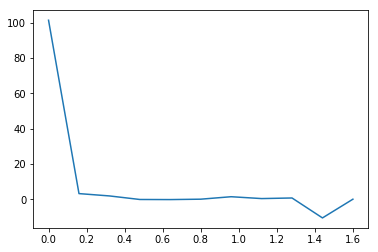

In [95]:
plt.plot(alphas, met_energy)
plt.show()

ValueError: setting an array element with a sequence.

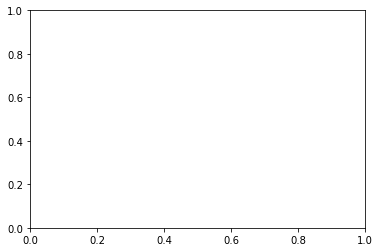

In [98]:
plt.plot(alphas, energy)
plt.show()

In [99]:
print (met_energy)
print (alphas)

[101.46519872714467, 3.3181967954432459, 1.9982259535147193, -0.013938426356591871, -0.067148309718814803, 0.15705399328774827, 1.5516016787901554, 0.50103455128361274, 0.83488066975030428, -10.449027449911412, 0.15036696786689752]
[ 0.    0.16  0.32  0.48  0.64  0.8   0.96  1.12  1.28  1.44  1.6 ]
